6.79_data_visualization_multi-variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

通过Matplotlib和Seaborn，对多个变量绘制图表

### 一、更改图例的位置

有时图例太长，会挡住图表里的元素，那我们可以把图例的位置进行更改。

调用Matplotlib的`legend`函数，传入参数`bbox_to_anchor=(横向位置, 纵向位置)`

`bbox_to_anchor`会把图例放在图表的边框外面去。

元组第一个元素：放入`0`表示图例会在图表左边，`1`表示图表右边

元组第二个元素：放入`0`表示图例顶部和接近图表下边框的位置对齐，`1`表示图例顶部和接近图表上边框的位置对齐

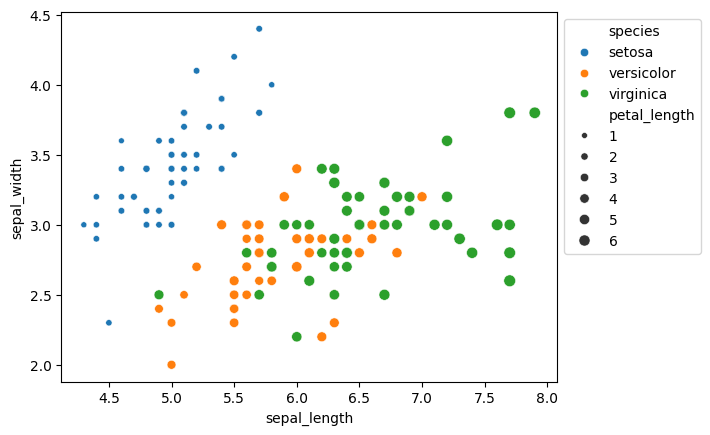

In [4]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species', size='petal_length')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### 二、增加变量

#### (一)、给散点图增加变量

In [3]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


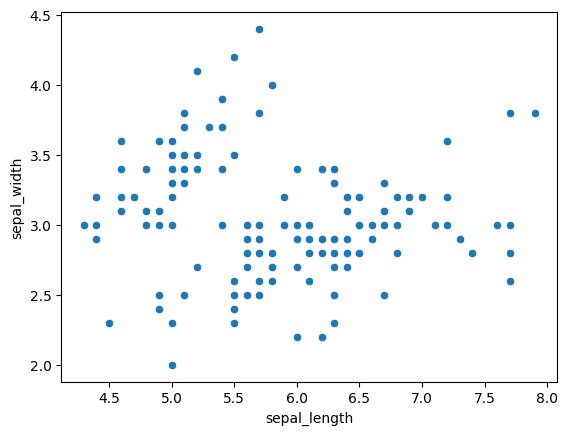

In [5]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width')
plt.show()

1. 增加1个分类变量

   可以传入可选参数`hue='分类变量'`，散点图会根据不同变量把点画成不同的颜色

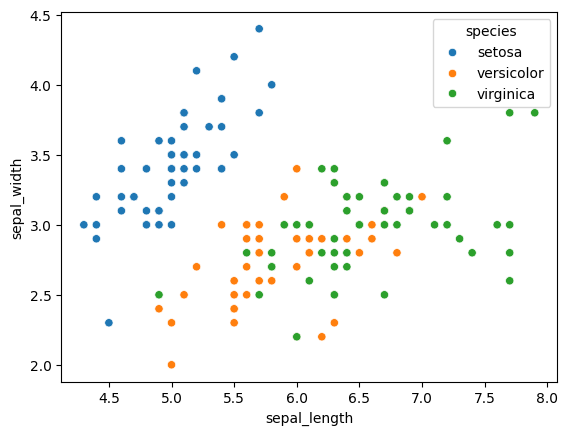

In [6]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

2. 增加1个数值变量

   - 通过添加颜色，表示不同数值
  
         可以传入可选参数`hue='数值变量'`，深色和浅色分别表示大的数值和小的数值。 

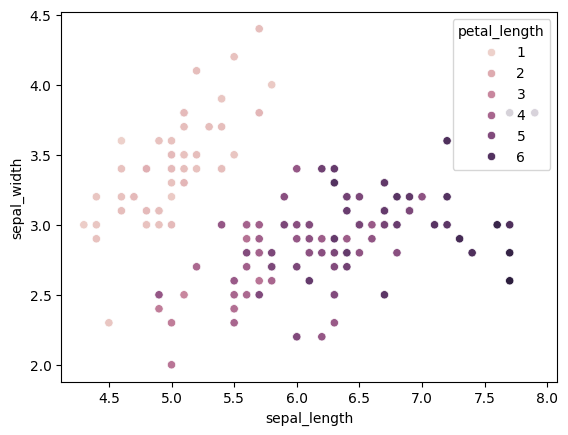

In [7]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='petal_length')
plt.show()

    -  通过添加尺寸，表示不同数值
    
        可以传入可选参数`size='数值变量'`，通过点的大小表示数值，也即绘制了一个气泡图。 

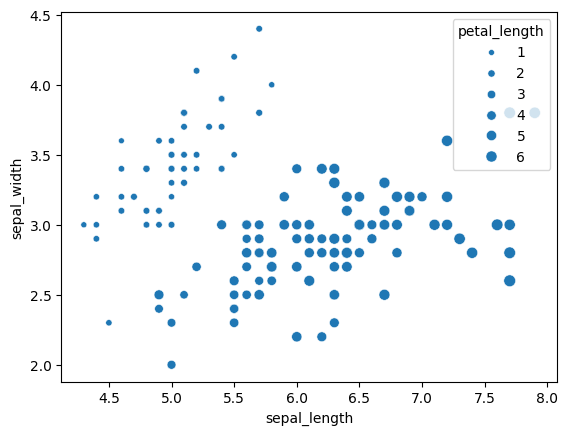

In [8]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', size='petal_length')
plt.show()

3. 增加1个分类变量，1个数值变量

   可选参数`hue='分类变量', size='数值变量'`

   用颜色表示种类，用点的大小表示数值，也即绘制了一个彩色气泡图

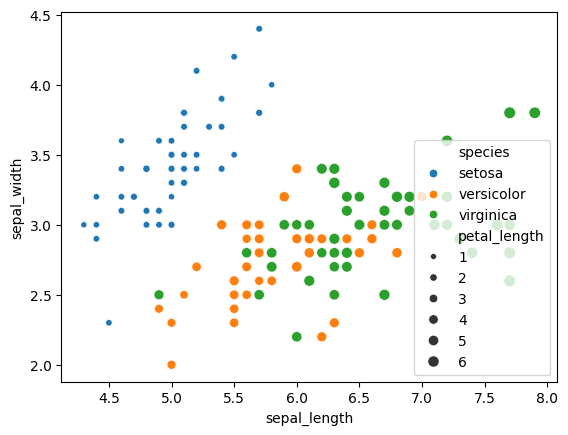

In [9]:
sns.scatterplot(iris, x='sepal_length', y='sepal_width', hue='species', size='petal_length')
plt.show()

#### (二)、给折线图增加变量

增加1个分类变量

可以传入可选参数`hue='分类变量'`，让不同颜色的先分别代表不同变量

In [10]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


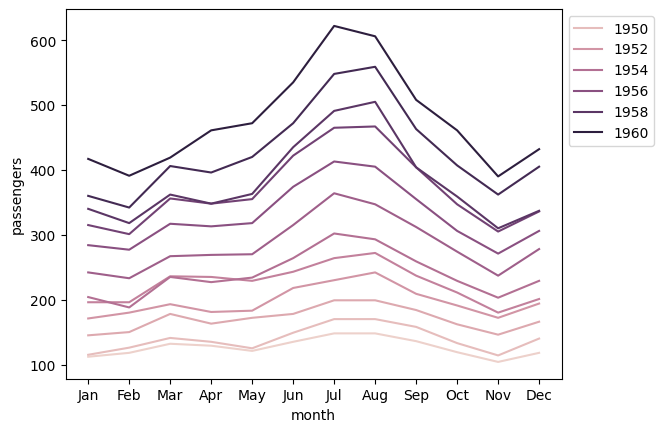

In [11]:
sns.lineplot(x=flights.month, y=flights.passengers, hue=flights.year)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### (三)、给条形图增加变量

增加1个分类变量，变成复式条形图

可以传入可选参数`hue='分类变量'`，让不同颜色的先分别代表不同变量

In [12]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


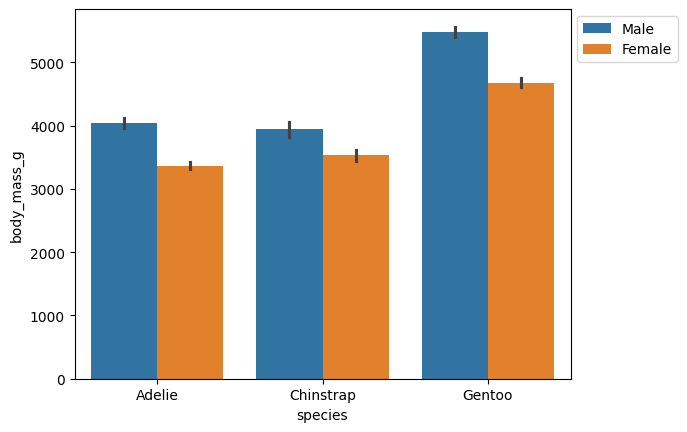

In [13]:
sns.barplot(penguins, x='species', y='body_mass_g', hue='sex')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### (四)、热力图

英文叫Heat Map，Seaborn绘制热力图的函数叫做heatmap

In [14]:
# 通过透视表导入示例数据
glue = sns.load_dataset('glue').pivot(index='Model', columns='Task', values='Score')
glue

Task,CoLA,MNLI,MRPC,QNLI,QQP,RTE,SST-2,STS-B
Model,,,,,,,,
BERT,60.5,86.7,89.3,92.7,72.1,70.1,94.9,87.6
BiLSTM,11.6,65.6,81.8,74.6,62.5,57.4,82.8,70.3
BiLSTM+Attn,18.6,67.6,83.9,74.3,60.1,58.4,83.0,72.8
BiLSTM+CoVe,18.5,65.4,78.7,70.8,60.6,52.7,81.9,64.4
BiLSTM+ELMo,32.1,67.2,84.7,75.5,61.1,57.4,89.3,70.3
ERNIE,75.5,92.3,93.9,97.3,75.2,92.6,97.8,93.0
RoBERTa,67.8,90.8,92.3,95.4,74.3,88.2,96.7,92.2
T5,71.6,92.2,92.8,96.9,75.1,92.8,97.5,93.1


<Axes: xlabel='Task', ylabel='Model'>

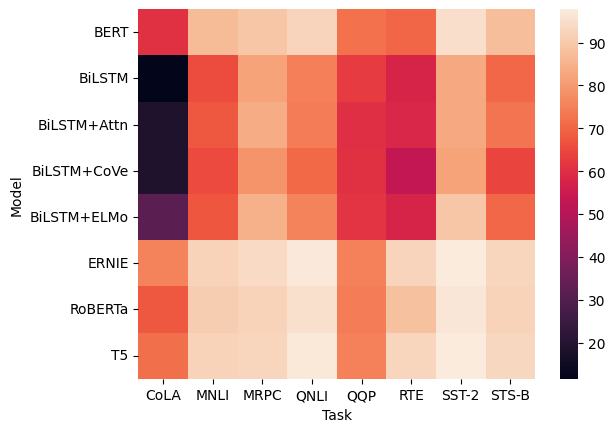

In [15]:
sns.heatmap(glue)

如果要在格子上把对应数值作为标签进行展示的话，传入可选参数`annot=True`，annot是annotation的简写

<Axes: xlabel='Task', ylabel='Model'>

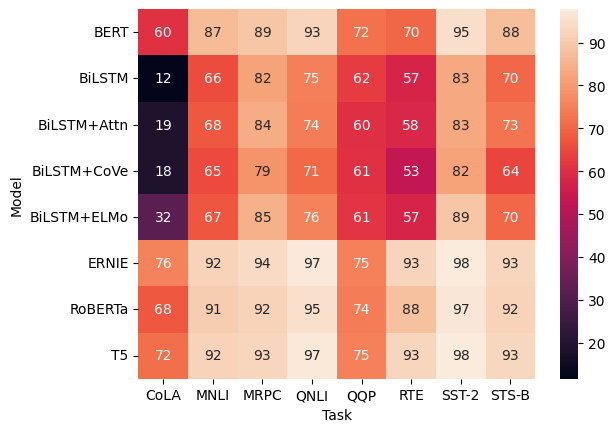

In [16]:
sns.heatmap(glue, annot=True)

### 三、图上绘制多个图表

#### (一)、图上绘制多个直方图

In [18]:
setosa = iris.query('species == "setosa"')
versicolor = iris.query('species == "versicolor"')
virginica = iris.query('species == "virginica"')

1. 图上绘制多个直方图

调用多次`histplot`函数，最后`plt.show`展示出来的图片里，多个直方图就都在里面了

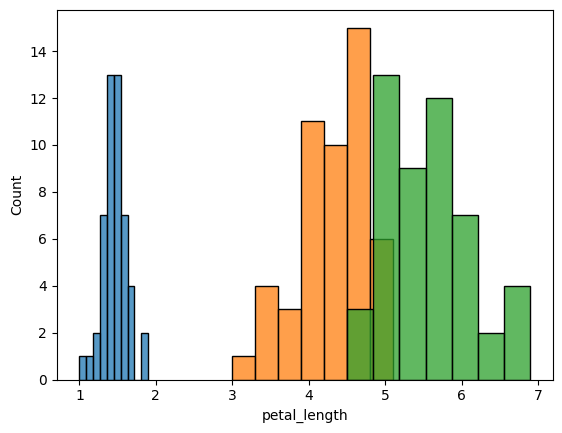

In [19]:
sns.histplot(setosa.petal_length)
sns.histplot(versicolor.petal_length)
sns.histplot(virginica.petal_length)
plt.show()

2. 统一条柱宽度

由于调用多次`histplot`函数进行绘制的时候，条柱是按照各自适合的粗细画的，我们只是把它们放到了同一张图上，所以会导致条柱的粗细不统一。

所以我们需要在调用`histplot`函数进行绘制的时候，指定条柱宽度。传入可选参数`binwidth=数值间距`

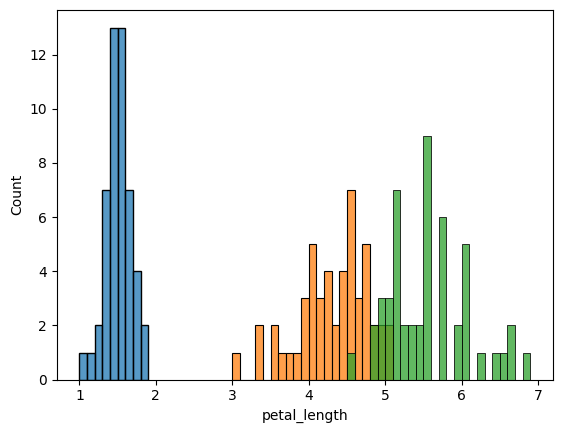

In [20]:
sns.histplot(setosa.petal_length, binwidth=0.1)
sns.histplot(versicolor.petal_length, binwidth=0.1)
sns.histplot(virginica.petal_length, binwidth=0.1)
plt.show()

3. 设置图例

另外一个问题是，这个图片没有图例，无法分清哪个颜色对应哪个种类。

为了解决这个问题，我们可以在调用`histplot`函数进行绘制时，传入可选参数`label="标签"`；然后需要调用下`plt.legend()`，手动让图例展示出来

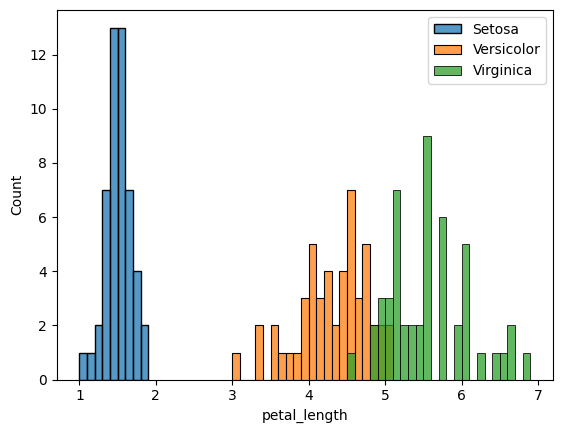

In [21]:
sns.histplot(setosa.petal_length, binwidth=0.1, label='Setosa')
sns.histplot(versicolor.petal_length, binwidth=0.1, label='Versicolor')
sns.histplot(virginica.petal_length, binwidth=0.1, label='Virginica')
plt.legend()
plt.show()

#### (二)、图上绘制多个密度图

图上绘制多个密度图与直方图是一样的步骤，唯一的区别是因为密度图是一条平滑的曲线，所以我们不需要可选参数`binwidth`去指定条柱的宽度了

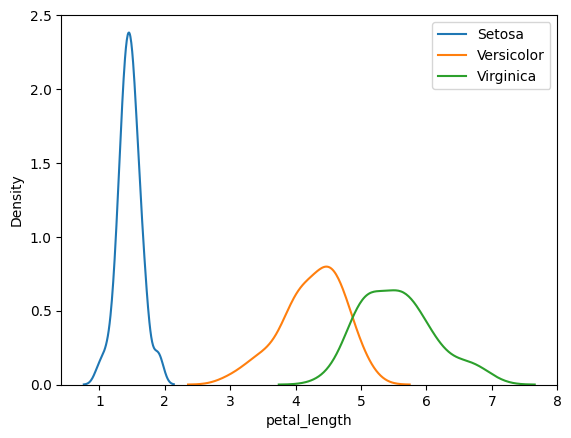

In [22]:
sns.kdeplot(setosa.petal_length, label='Setosa')
sns.kdeplot(versicolor.petal_length, label='Versicolor')
sns.kdeplot(virginica.petal_length, label='Virginica')
plt.legend()
plt.show()

#### (三)、图上绘制多个箱型图/小提琴图

如果和直方图及密度图一样，在图上绘制多个箱型图/小提琴图，这样它们会都挤在同一条纵线上，因为和前面不同的是，这次横轴并不表示数值

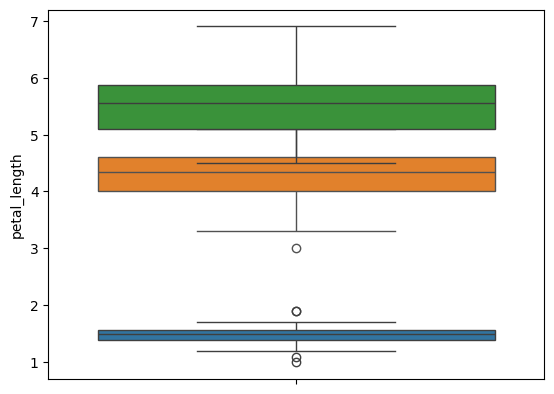

In [26]:
sns.boxplot(setosa.petal_length)
sns.boxplot(versicolor.petal_length)
sns.boxplot(virginica.petal_length)
plt.show()

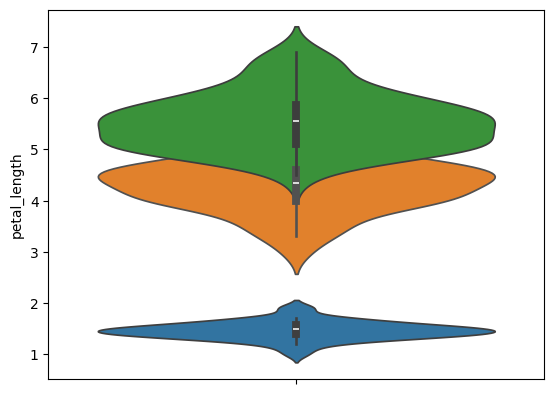

In [27]:
sns.violinplot(setosa.petal_length)
sns.violinplot(versicolor.petal_length)
sns.violinplot(virginica.petal_length)
plt.show()

这种情况下，更好的选择是，通过添加坐标轴，在图表上表示分类变量。传入可选参数`x='分类变量'`

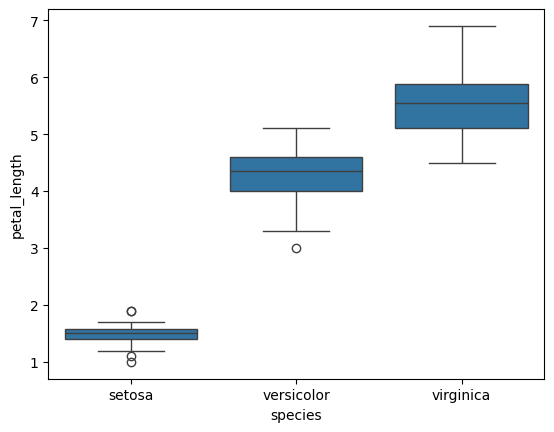

In [28]:
sns.boxplot(iris, y='petal_length', x='species')
plt.show()

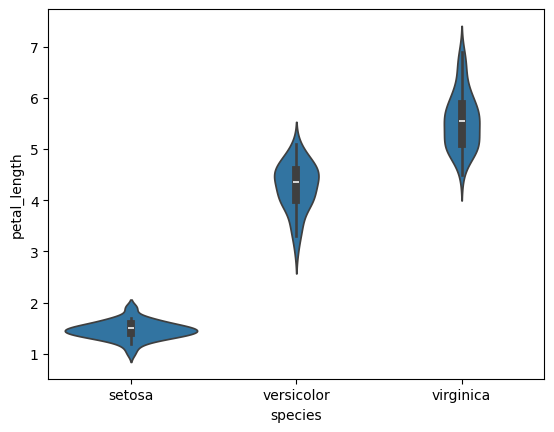

In [29]:
sns.violinplot(iris, y='petal_length', x='species')
plt.show()

总之，当我们想在图上表示多个变量的时候，要根据图表的具体种类选择合适的操作方法。

### 四、图上绘制多个子图

除了把不同图形放到同一个图里，还有的时候我们是想把单独的图，并排放在一起，这样的话可以让图表排版得更加紧密，因为默认的情况下，Seaborn一行只会放一张图

1. 图上绘制多个子图
  
   需要用Matplotlib的`subplots`函数，`plt.subplot(行数, 列数)`

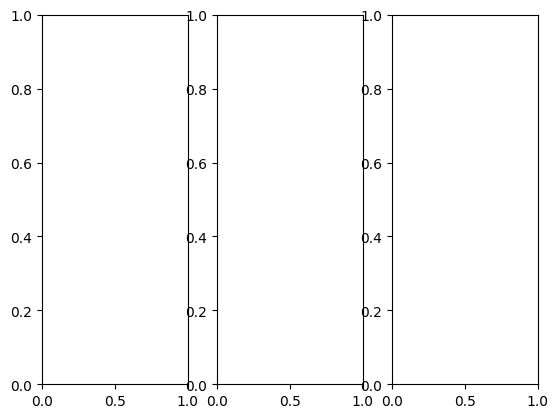

In [30]:
plt.subplots(1, 3)
plt.show()

2. 指定子图的宽和高

   传入可选参数`figsize=(宽, 高)`

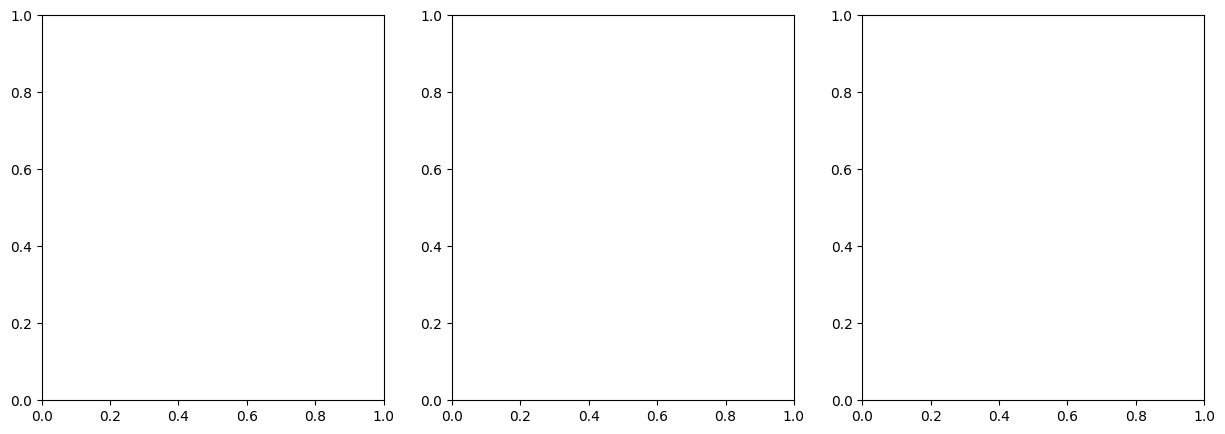

In [31]:
plt.subplots(1, 3, figsize=(15, 5))
plt.show()

3. 把图表画进空白的子图

   - 把`subplots`返回的结果，赋值为`fig`和`axes`两个变量，`fig`对应整个大图，而`axes`对应一系列子图，所以我们主要用到的是`axes`
  
   - 正常调用绘图函数，调用绘图函数时，传入可选参数`ax=axes[n]`

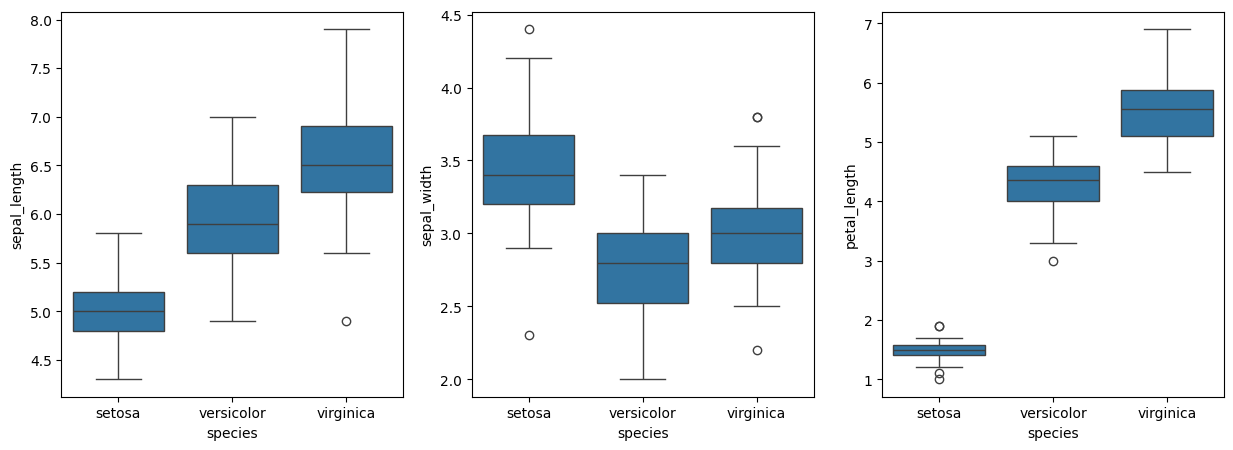

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(iris, y='sepal_length', x='species', ax=axes[0])
sns.boxplot(iris, y='sepal_width', x='species', ax=axes[1])
sns.boxplot(iris, y='petal_length', x='species', ax=axes[2])
plt.show()

### 五、配对图

Seaborn的pairplot函数，传入DataFrame后，它会把数据里面数值变量之间的，所有两两关系都绘制出来，一共得到N*N个图，N表示传入DataFrame里数值变量的个数。

具体来说，它会把各变量的分布用直方图绘制出来，然后把不同变量凉凉之间的关系绘制成散点图，所以非常适合一次性探索变量分布，以及不同变量之间的关系

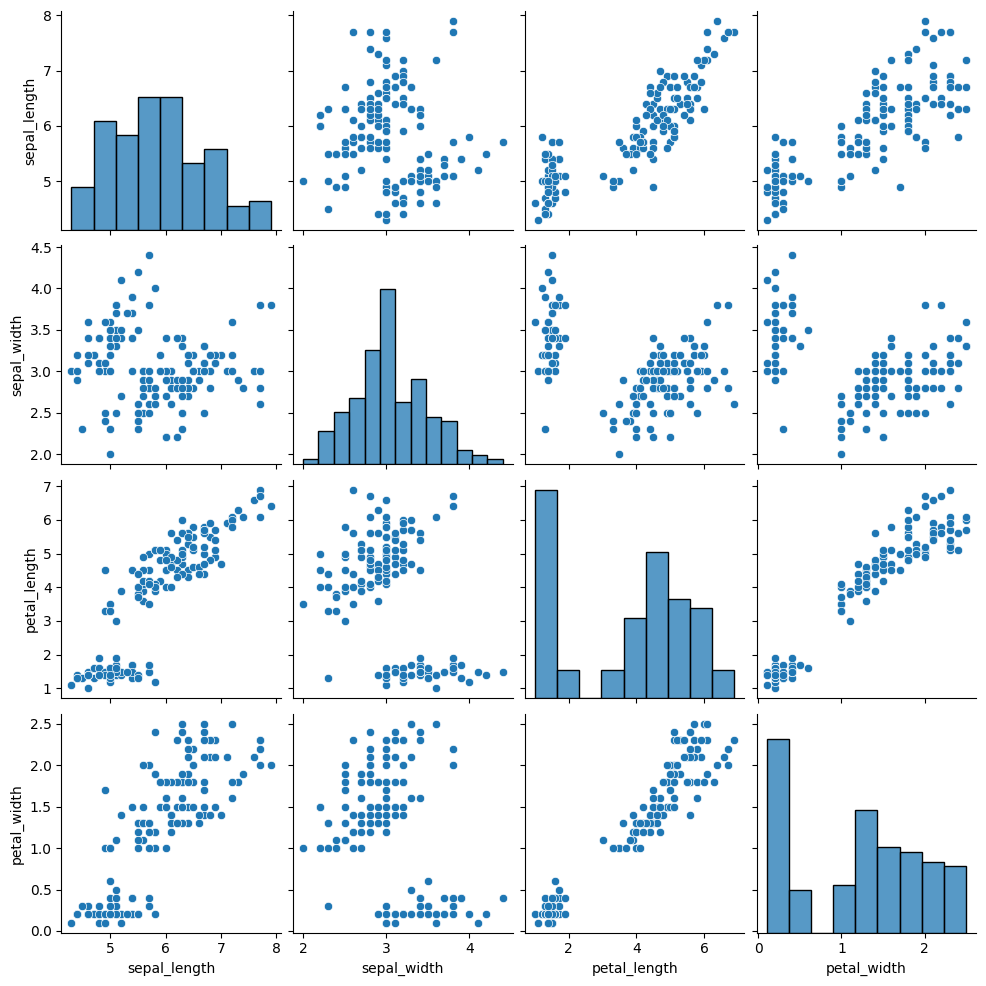

In [34]:
sns.pairplot(iris)
plt.show()

也可以传入可选参数`hue='分类变量'`，因此可以一次性对比不同分类变量的数值关系

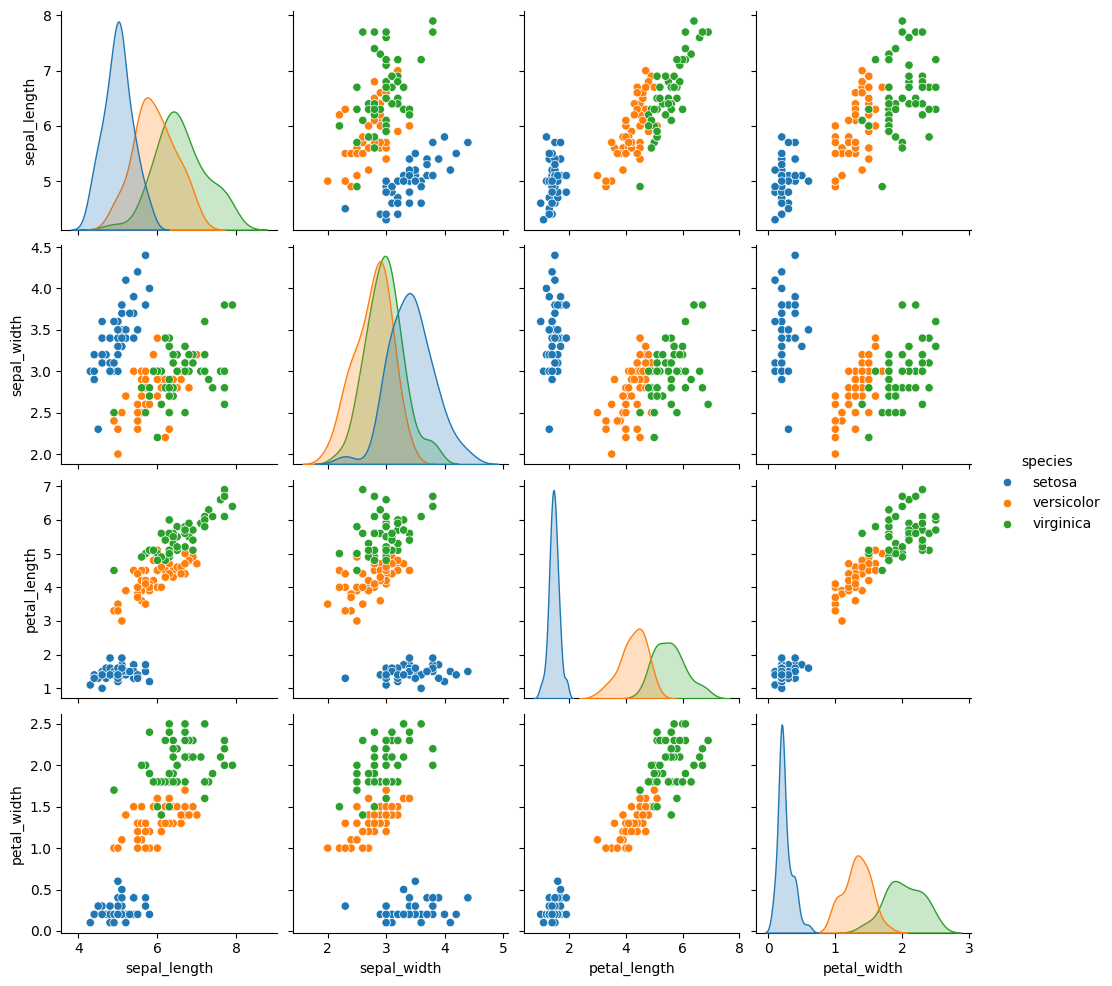

In [35]:
sns.pairplot(iris, hue='species')
plt.show()

**数据可视化环节，可以用在数据分析流程的方方面面**

1. 清洗环节

   可以通过绘制箱型图来寻找异常值的存在，然后根据具体情况考虑是否删除异常值，

2. 假设检验之前

   可以先通过直方图或密度图查看它们之间的关系，对比差异从图上来看是否显著，然后再进行科学化的数值检验

3. 绘制图表本身也是一种探索数据、分析数据的方式